<center>
<h1>
Présentation finale:
</h1>
</center>

In [6]:
import sys, os
sys.path.append("../")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from utils import normalize
import utils
from kmeans import KMeans
from sklearn.decomposition import PCA
from pso import ParticleSwarmOptimizedClustering
from particle import quantization_error, calc_sse
import seaborn
from sklearn.metrics import silhouette_score
seaborn.set_palette('husl')

<center>
<h1>
Iris:
</h1>
</center>

## Lecture des datasets

In [7]:
data = pd.read_csv('../data/iris.data', sep=',', header=None)
data_classes = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
Y_iris = np.array(data[4].apply(data_classes.index))
X_iris = data.drop([4], axis=1)
X_iris = X_iris.values
X_iris = normalize(X_iris)
data[4].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: 4, dtype: int64

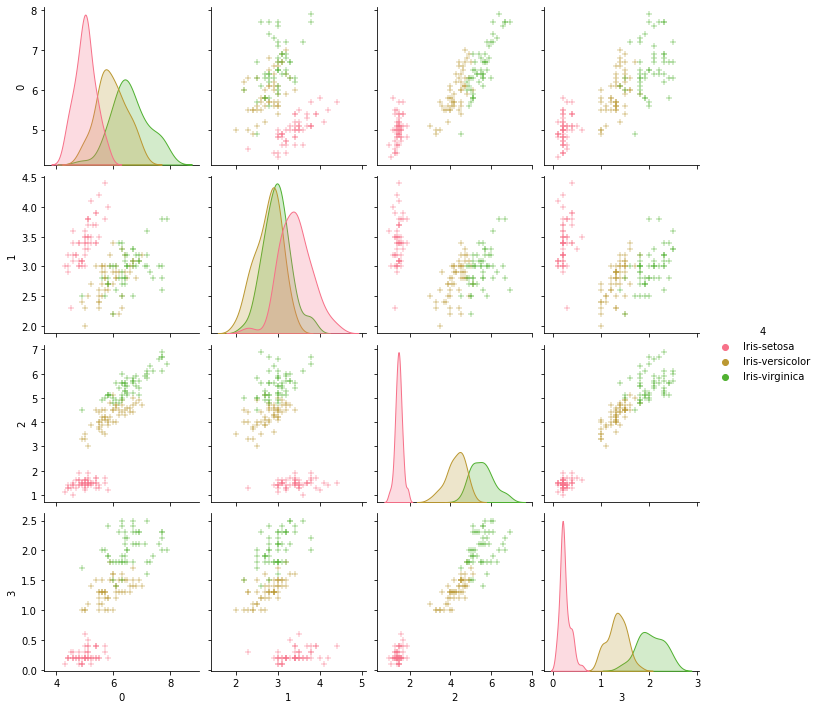

In [8]:
g = seaborn.pairplot(data, hue=4, markers='+')
plt.show()

## ACP

In [9]:
pca = PCA(X_iris.shape[1])
X_iris_r = pca.fit(X_iris).transform(X_iris)

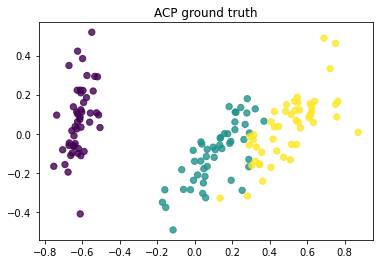

In [54]:
plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c = Y_iris, alpha=.8, s = 40, cmap='viridis')
plt.title("ACP ground truth")
plt.show()

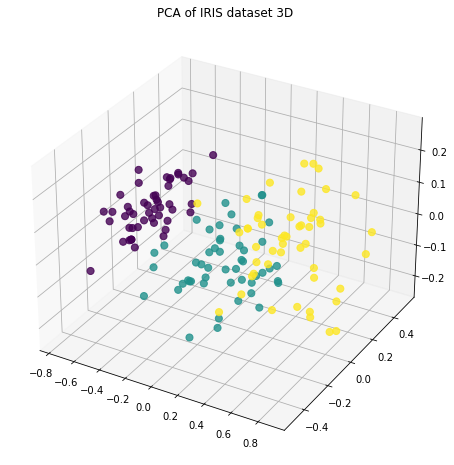

In [11]:
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')
colors = []
sctt = ax.scatter3D(X_iris_r[:,0],X_iris_r[:,1],X_iris_r[:,2],c = Y_iris, s = 50, alpha = 0.8)
plt.title("PCA of IRIS dataset 3D")
plt.show()

## K-means:

Silhouette: 0.5043188549150883
SSE: 6.998114004826762
Quantization: 0.19524413664147766
Err_ratio: (0.8866666666666667, (2, 1, 0))


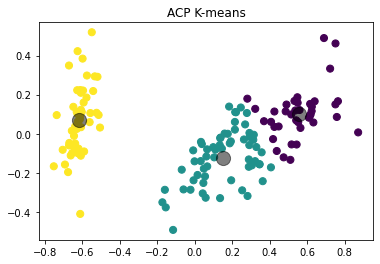

In [55]:
kmeans = KMeans(n_cluster=3, init_pp=False, seed=2021)
kmeans.fit(X_iris)
predicted_kmeans = kmeans.predict(X_iris)
print('Silhouette:', silhouette_score(X_iris, predicted_kmeans))
print('SSE:', kmeans.SSE)
print('Quantization:', quantization_error(centroids=kmeans.centroid, data=X_iris, labels=predicted_kmeans))
print('Err_ratio:', utils.stupid_precision_ratio(predicted_kmeans, Y_iris, 3))

plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c = predicted_kmeans, s=50, cmap='viridis')
centers = pca.transform(kmeans.centroid) 
plt.title("ACP K-means")
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha=0.5);

## K-means++:

Silhouette: 0.5043188549150883
SSE: 6.998114004826762
Quantization: 0.19524413664147766
Err_ratio: (0.8866666666666667, (0, 2, 1))


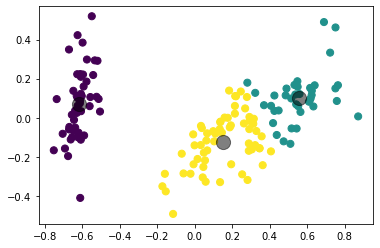

In [13]:
kmeans = KMeans(n_cluster=3, init_pp=True, seed=2017)
kmeans.fit(X_iris)
predicted_kmeans = kmeans.predict(X_iris)
print('Silhouette:', silhouette_score(X_iris, predicted_kmeans))
print('SSE:', kmeans.SSE)
print('Quantization:', quantization_error(centroids=kmeans.centroid, data=X_iris, labels=predicted_kmeans))
print('Err_ratio:', utils.stupid_precision_ratio(predicted_kmeans, Y_iris, 3))

plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c = predicted_kmeans, s=50, cmap='viridis')
centers = pca.transform(kmeans.centroid) 
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha=0.5);

## PSO

Initial global best score 12.875146241412816
Iteration 0001/2000 current gbest score 11.387964086804448272
Finish with gbest score 7.809551487188995722
Silhouette: 0.5064519458966582
SSE: 7.809551487188996
Quantization: 0.20723175161318785
Err_ratio: (0.9066666666666666, (1, 2, 0))


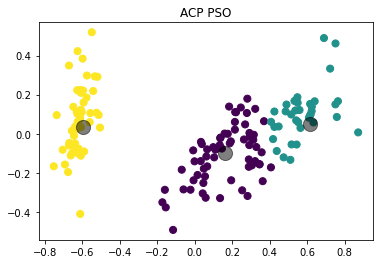

In [56]:
pso = ParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=20,dump_w=0.99,w=1,c2=2,c1=1, data=X_iris, hybrid = False, max_iter=2000, print_debug=4000, seed = 2021)

hist = pso.run()

pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
pso_kmeans.centroid = pso.gbest_centroids.copy()
predicted_pso = pso_kmeans.predict(X_iris)
print('Silhouette:', silhouette_score(X_iris, predicted_pso))
print('SSE:', calc_sse(centroids=pso.gbest_centroids, data=X_iris, labels=predicted_pso))
print('Quantization:', quantization_error(pso.gbest_centroids, predicted_pso, X_iris))
print('Err_ratio:', utils.stupid_precision_ratio(predicted_pso, Y_iris, 3))
plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c = predicted_pso, s=50, cmap='viridis')
centers = pca.transform(pso_kmeans.centroid) 
plt.title("ACP PSO")
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha=0.5);

## PSO-Hybrid

Initial global best score 6.998114004826762
Iteration 0001/4000 current gbest score 6.998114004826762269
Finish with gbest score 6.998114004826760493
Silhouette: 0.5043188549150883
SSE: 6.9981140048267605
Quantization: 0.1952441366500802
Err_ratio: (0.8866666666666667, (2, 0, 1))


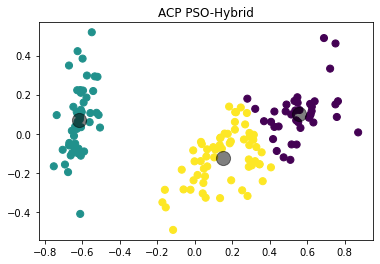

In [57]:
pso = ParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=20,dump_w=0.99,w=1,c2=2,c1=1, data=X_iris, hybrid = True, max_iter=4000, print_debug=4000, seed = 2021)

hist = pso.run()

pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
pso_kmeans.centroid = pso.gbest_centroids.copy()
predicted_pso = pso_kmeans.predict(X_iris)
print('Silhouette:', silhouette_score(X_iris, predicted_pso))
print('SSE:', calc_sse(centroids=pso.gbest_centroids, data=X_iris, labels=predicted_pso))
print('Quantization:', quantization_error(pso.gbest_centroids, predicted_pso, X_iris))
print('Err_ratio:', utils.stupid_precision_ratio(predicted_pso, Y_iris, 3))
plt.scatter(X_iris_r[:, 0], X_iris_r[:, 1], c = predicted_pso, s=50, cmap='viridis')
centers = pca.transform(pso_kmeans.centroid) 
plt.title("ACP PSO-Hybrid")
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s=200, alpha=0.5);

<center>
<h1>
Tests:
</h1>
</center>

### K-Means++

In [35]:
kmeanspp = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
    'accuracy': [],
}
for _ in range(20):
    kmean_rep = KMeans(n_cluster=3, init_pp=True, seed = 200+_)
    kmean_rep.fit(X_iris)
    predicted_kmean_rep = kmean_rep.predict(X_iris)
    silhouette = silhouette_score(X_iris, predicted_kmean_rep)
    sse = kmean_rep.SSE
    quantization = quantization_error(centroids=kmean_rep.centroid, data=X_iris, labels=predicted_kmean_rep)
    kmeanspp['silhouette'].append(silhouette)
    kmeanspp['sse'].append(sse)
    kmeanspp['quantization'].append(quantization)
    kmeanspp['accuracy'].append(utils.stupid_precision_ratio(predicted_kmean_rep, Y_iris, 3)[0])

### PSO 

In [36]:
%%time
pso_plain = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
    'accuracy': [],
}
for _ in range(20):
    pso_rep = ParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=20, data=X_iris,dump_w=0.99,c1=2,c2=1,w=1, hybrid=False, max_iter=4000, print_debug=2000, seed = 1995+_)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(X_iris)
    
    silhouette = silhouette_score(X_iris, predicted_pso_rep)
    sse = calc_sse(centroids=pso_rep.gbest_centroids, data=X_iris, labels=predicted_pso_rep)
    quantization = pso_rep.gbest_score
    pso_plain['silhouette'].append(silhouette)
    pso_plain['sse'].append(sse)
    pso_plain['quantization'].append(quantization)
    pso_plain['accuracy'].append(utils.stupid_precision_ratio(predicted_pso_rep, Y_iris, 3)[0])

..\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Initial global best score 11.602333245998558
Iteration 0001/4000 current gbest score 10.526687060851132927
Iteration 2001/4000 current gbest score 7.931525643357718813
Finish with gbest score 7.931525643357702826
Initial global best score 11.210720742407636
Iteration 0001/4000 current gbest score 9.753987217943445032


..\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Iteration 2001/4000 current gbest score 7.486839211328211618
Finish with gbest score 7.486839211328211618
Initial global best score 11.316869675682096
Iteration 0001/4000 current gbest score 10.047069769410697404
Iteration 2001/4000 current gbest score 7.751843401420986268
Finish with gbest score 7.751843401420986268
Initial global best score 8.896614248069767
Iteration 0001/4000 current gbest score 8.126066374067736575


..\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Iteration 2001/4000 current gbest score 7.209025664143545953
Finish with gbest score 7.209025664143541512
Initial global best score 11.874882630044574
Iteration 0001/4000 current gbest score 11.282195565554655303
Iteration 2001/4000 current gbest score 7.413832120676220327
Finish with gbest score 7.413832120676220327
Initial global best score 10.330510247871159
Iteration 0001/4000 current gbest score 8.619532745075186853


..\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Iteration 2001/4000 current gbest score 7.212076480115596766
Finish with gbest score 7.212076480115596766
Initial global best score 9.878694271991513
Iteration 0001/4000 current gbest score 9.468792632443669532
Iteration 2001/4000 current gbest score 7.587482705150215168
Finish with gbest score 7.587482705150215168
Initial global best score 9.698923953578685
Iteration 0001/4000 current gbest score 8.972469936609847707


..\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Iteration 2001/4000 current gbest score 7.416047878697370699
Finish with gbest score 7.416047878697370699
Initial global best score 10.378119225708518
Iteration 0001/4000 current gbest score 9.589276311254593566
Iteration 2001/4000 current gbest score 7.065790865845015034
Finish with gbest score 7.065790865845015034
Initial global best score 9.767414919527877
Iteration 0001/4000 current gbest score 9.767414919527876549
Iteration 2001/4000 current gbest score 7.796609838431880490
Finish with gbest score 7.796609838431880490
Initial global best score 11.601281183390608
Iteration 0001/4000 current gbest score 9.439007999589065889
Iteration 2001/4000 current gbest score 7.614653123429061310
Finish with gbest score 7.614653123429061310
Initial global best score 11.344581952379936
Iteration 0001/4000 current gbest score 10.809949690211862361


..\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Iteration 2001/4000 current gbest score 7.709768885225997792
Finish with gbest score 7.709768885225996016
Initial global best score 9.626605386028563
Iteration 0001/4000 current gbest score 9.195047670042457710


..\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Iteration 2001/4000 current gbest score 7.489580960910975804
Finish with gbest score 7.489580960910968699
Initial global best score 8.57799322202361
Iteration 0001/4000 current gbest score 8.503920345377469658


..\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Iteration 2001/4000 current gbest score 7.354482328574613703
Finish with gbest score 7.354482328574613703
Initial global best score 11.82478749277382
Iteration 0001/4000 current gbest score 11.388435355230502211
Iteration 2001/4000 current gbest score 7.402154857084340733
Finish with gbest score 7.402154857084340733
Initial global best score 8.523819506509763
Iteration 0001/4000 current gbest score 8.523819506509763499


..\particle.py:14: RuntimeWarning: invalid value encountered in double_scalars
  dist /= len(idx)


Iteration 2001/4000 current gbest score 7.248707673278270036
Finish with gbest score 7.248707673278270036
Initial global best score 9.776009304034952
Iteration 0001/4000 current gbest score 8.546864881784127732
Iteration 2001/4000 current gbest score 7.290526822914573657
Finish with gbest score 7.290526822914573657
Initial global best score 9.651647246871018
Iteration 0001/4000 current gbest score 8.961092931874290457
Iteration 2001/4000 current gbest score 7.487415043870863762
Finish with gbest score 7.487415043870863762
Initial global best score 9.526563791180338
Iteration 0001/4000 current gbest score 8.507355492923997176
Iteration 2001/4000 current gbest score 7.502499356466107550
Finish with gbest score 7.502499356466107550
Initial global best score 8.635844972797655
Iteration 0001/4000 current gbest score 8.635844972797654506
Iteration 2001/4000 current gbest score 7.347685927829544994
Finish with gbest score 7.347685927829544994
Wall time: 2min 37s


### PSO Hybrid

In [39]:
%%time
pso_hybrid = {
    'silhouette': [],
    'sse' : [],
    'quantization' : [],
    'accuracy': [],
}
for _ in range(20):
    pso_rep = ParticleSwarmOptimizedClustering(
        n_cluster=3, n_particles=20, data=X_iris,dump_w=0.99,c1=2,c2=1,w=1, hybrid=True, max_iter=4000, print_debug=2000, seed = 1995+_)
    pso_rep.run()
    pso_kmeans = KMeans(n_cluster=3, init_pp=False, seed=2018)
    pso_kmeans.centroid = pso_rep.gbest_centroids.copy()
    predicted_pso_rep = pso_kmeans.predict(X_iris)
    
    silhouette = silhouette_score(X_iris, predicted_pso_rep)
    sse = calc_sse(centroids=pso_rep.gbest_centroids, data=X_iris, labels=predicted_pso_rep)
    quantization = pso_rep.gbest_score
    pso_hybrid['silhouette'].append(silhouette)
    pso_hybrid['sse'].append(sse)
    pso_hybrid['quantization'].append(quantization)
    pso_hybrid['accuracy'].append(utils.stupid_precision_ratio(predicted_pso_rep, Y_iris, 3)[0])

Initial global best score 6.998114004826762
Iteration 0001/4000 current gbest score 6.998114004826762269
Iteration 2001/4000 current gbest score 6.998114004826760493
Finish with gbest score 6.998114004826760493
Initial global best score 6.998114004826762
Iteration 0001/4000 current gbest score 6.998114004826762269
Iteration 2001/4000 current gbest score 6.998114004826760493
Finish with gbest score 6.998114004826760493
Initial global best score 6.998114004826762
Iteration 0001/4000 current gbest score 6.998114004826762269
Iteration 2001/4000 current gbest score 6.998114004826760493
Finish with gbest score 6.998114004826760493
Initial global best score 6.998114004826762
Iteration 0001/4000 current gbest score 6.998114004826762269
Iteration 2001/4000 current gbest score 6.998114004826760493
Finish with gbest score 6.998114004826760493
Initial global best score 6.998114004826762
Iteration 0001/4000 current gbest score 6.998114004826762269
Iteration 2001/4000 current gbest score 6.998114004

# Comparison

In [58]:
benchmark = {
    'method' : ['K-Means++', 'PSO', 'PSO Hybrid'],
    'acc_max' : [
        np.around(np.max(kmeanspp['accuracy']), decimals=10),
        np.around(np.max(pso_plain['accuracy']), decimals=10),
        np.around(np.max(pso_hybrid['accuracy']), decimals=10),
    ],
    'acc_mean' : [
        np.around(np.mean(kmeanspp['accuracy']), decimals=10),
        np.around(np.mean(pso_plain['accuracy']), decimals=10),
        np.around(np.mean(pso_hybrid['accuracy']), decimals=10),
    ],
    'acc_stdev' : [
        np.around(np.std(kmeanspp['accuracy']), decimals=10),
        np.around(np.std(pso_plain['accuracy']), decimals=10),
        np.around(np.std(pso_hybrid['accuracy']), decimals=10),
    ],
    'sse_min' : [
        np.around(np.min(kmeanspp['sse']), decimals=10),
        np.around(np.min(pso_plain['sse']), decimals=10),
        np.around(np.min(pso_hybrid['sse']), decimals=10),
    ],
    'sse_mean' : [
        np.around(np.mean(kmeanspp['sse']), decimals=10),
        np.around(np.mean(pso_plain['sse']), decimals=10),
        np.around(np.mean(pso_hybrid['sse']), decimals=10),
    ],
    'sse_stdev' : [
        np.around(np.std(kmeanspp['sse']), decimals=10),
        np.around(np.std(pso_plain['sse']), decimals=10),
        np.around(np.std(pso_hybrid['sse']), decimals=10),
    ],
    'silhouette_mean' : [
        np.around(np.mean(kmeanspp['silhouette']), decimals=10),
        np.around(np.mean(pso_plain['silhouette']), decimals=10),
        np.around(np.mean(pso_hybrid['silhouette']), decimals=10),
    ],
    'silhouette_stdev' : [
        np.around(np.std(kmeanspp['silhouette']), decimals=10),
        np.around(np.std(pso_plain['silhouette']), decimals=10),
        np.around(np.std(pso_hybrid['silhouette']), decimals=10),
    ],
    'quantization_mean' : [
        np.around(np.mean(kmeanspp['quantization']), decimals=10),
        np.around(np.mean(pso_plain['quantization']), decimals=10),
        np.around(np.mean(pso_hybrid['quantization']), decimals=10),
    ],
    'quantization_stdev' : [
        np.around(np.std(kmeanspp['quantization']), decimals=10),
        np.around(np.std(pso_plain['quantization']), decimals=10),
        np.around(np.std(pso_hybrid['quantization']), decimals=10),
    ],
}

In [59]:
benchmark

{'method': ['K-Means++', 'PSO', 'PSO Hybrid'],
 'acc_max': [0.8866666667, 0.9333333333, 0.8866666667],
 'acc_mean': [0.7583333333, 0.89, 0.8866666667],
 'acc_stdev': [0.1510684172, 0.0132497379, 0.0],
 'sse_min': [6.9981140048, 7.0657908658, 6.9981140048],
 'sse_mean': [8.6254185634, 7.4659274394, 6.9981140048],
 'sse_stdev': [1.8645403774, 0.2134476476, 0.0],
 'silhouette_mean': [0.4918273422, 0.4942285866, 0.5043188549],
 'silhouette_stdev': [0.0087425428, 0.0109521237, 0.0],
 'quantization_mean': [0.1995628967, 7.4659274394, 6.9981140048],
 'quantization_stdev': [0.0044348832, 0.2134476476, 0.0]}

In [60]:
benchmark_df = pd.DataFrame.from_dict(benchmark)
benchmark_df

,method,acc_max,acc_mean,acc_stdev,sse_min,sse_mean,sse_stdev,silhouette_mean,silhouette_stdev,quantization_mean,quantization_stdev
0,K-Means++,0.886667,0.758333,0.151068,6.998114,8.625419,1.864540,0.491827,0.008743,0.199563,0.004435
1,PSO,0.933333,0.890000,0.013250,7.065791,7.465927,0.213448,0.494229,0.010952,7.465927,0.213448
2,PSO Hybrid,0.886667,0.886667,0.000000,6.998114,6.998114,0.000000,0.504319,0.000000,6.998114,0.000000


In [61]:
benchmark_df.to_excel('benchmark_iris_res.xlsx', index=False)
benchmark_df.to_csv('benchmark_iris_res.csv', index=False)

In [62]:
kmeanspp

{'silhouette': [0.49766753566126076,
  0.48247222154221103,
  0.48247222154221103,
  0.49766753566126076,
  0.49766753566126076,
  0.48247222154221103,
  0.49766753566126076,
  0.49766753566126076,
  0.48247222154221103,
  0.49766753566126076,
  0.5043188549150883,
  0.48247222154221103,
  0.5043188549150883,
  0.48247222154221103,
  0.48247222154221103,
  0.49766753566126076,
  0.48247222154221103,
  0.48247222154221103,
  0.49766753566126076,
  0.5043188549150883],
 'sse': [10.90827498962253,
  7.138647703985377,
  7.138647703985377,
  10.90827498962253,
  10.90827498962253,
  7.138647703985377,
  10.90827498962253,
  10.90827498962253,
  7.138647703985377,
  10.90827498962253,
  6.998114004826762,
  7.138647703985377,
  6.998114004826762,
  7.138647703985377,
  7.138647703985377,
  10.90827498962253,
  7.138647703985377,
  7.138647703985377,
  10.90827498962253,
  6.998114004826762],
 'quantization': [0.2049806792871817,
  0.19618667657047784,
  0.19618667657047784,
  0.204980679287

In [45]:
pso_plain

{'silhouette': [0.4830657741271051,
  0.48007316145531037,
  0.5028854849182542,
  0.4836586822433867,
  0.47871419479592103,
  0.5061626262368143,
  0.47871419479592103,
  0.4822748343598165,
  0.5043188549150883,
  0.5017620948699653,
  0.4926167995169693,
  0.4989225462682051,
  0.5043188549150883,
  0.5043188549150883,
  0.4822748343598165,
  0.5017620948699653,
  0.5043188549150883,
  0.5061626262368143,
  0.48208373640392066,
  0.5061626262368143],
 'sse': [7.931525643357703,
  7.486839211328212,
  7.751843401420986,
  7.2090256641435415,
  7.41383212067622,
  7.212076480115597,
  7.587482705150215,
  7.416047878697371,
  7.065790865845015,
  7.7966098384318805,
  7.614653123429061,
  7.709768885225996,
  7.489580960910969,
  7.354482328574614,
  7.402154857084341,
  7.24870767327827,
  7.290526822914574,
  7.487415043870864,
  7.5024993564661075,
  7.347685927829545],
 'quantization': [7.931525643357703,
  7.486839211328212,
  7.751843401420986,
  7.2090256641435415,
  7.4138321

In [46]:
pso_hybrid

{'silhouette': [0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883,
  0.5043188549150883],
 'sse': [6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605],
 'quantization': [6.9981140048267605,
  6.9981140048267605,
  6.9981140048267605,
  6.99811400482